In [2]:
!pip install PyDrive


In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
downloaded = drive.CreateFile({'id':"1kZXI4ONV4T166v-EUirvOT8aXgP2lAmg"})   # replace the id with id of file you want to access
downloaded.GetContentFile('combined_data_1.txt') 

'''
downloaded = drive.CreateFile({'id':"1i8T62KDEv4qqhx5JarhZJSE2dws71u5k"})   # replace the id with id of file you want to access
downloaded.GetContentFile('combined_data_2.txt')  

downloaded = drive.CreateFile({'id':"1CLwcvzytUkg7-gmSN_xqzFDi2FUuwL1S"})   # replace the id with id of file you want to access
downloaded.GetContentFile('combined_data_3.txt')  

downloaded = drive.CreateFile({'id':"1QOLqBYzMBk1gQG4D_jp5Y6q1l8ytnN9d"})   # replace the id with id of file you want to access
downloaded.GetContentFile('combined_data_4.txt')  

downloaded = drive.CreateFile({'id':"1r525jFDq5EUOxHahJCL3zjEMPiFQ5X6i"})   # replace the id with id of file you want to access
downloaded.GetContentFile('probe.txt')  

downloaded = drive.CreateFile({'id':"1hBXwM5bUib3p9k0NV5h1je9hKHf1ATZd"})   # replace the id with id of file you want to access
downloaded.GetContentFile('qualifying.txt')  
'''

'\ndownloaded = drive.CreateFile({\'id\':"1i8T62KDEv4qqhx5JarhZJSE2dws71u5k"})   # replace the id with id of file you want to access\ndownloaded.GetContentFile(\'combined_data_2.txt\')  \n\ndownloaded = drive.CreateFile({\'id\':"1CLwcvzytUkg7-gmSN_xqzFDi2FUuwL1S"})   # replace the id with id of file you want to access\ndownloaded.GetContentFile(\'combined_data_3.txt\')  \n\ndownloaded = drive.CreateFile({\'id\':"1QOLqBYzMBk1gQG4D_jp5Y6q1l8ytnN9d"})   # replace the id with id of file you want to access\ndownloaded.GetContentFile(\'combined_data_4.txt\')  \n\ndownloaded = drive.CreateFile({\'id\':"1r525jFDq5EUOxHahJCL3zjEMPiFQ5X6i"})   # replace the id with id of file you want to access\ndownloaded.GetContentFile(\'probe.txt\')  \n\ndownloaded = drive.CreateFile({\'id\':"1hBXwM5bUib3p9k0NV5h1je9hKHf1ATZd"})   # replace the id with id of file you want to access\ndownloaded.GetContentFile(\'qualifying.txt\')  \n'

In [6]:

import pickle
import pandas as pd
import numpy as np
import math

In [7]:
data = open('data.csv','w')
files = ['combined_data_1.txt'] #,'combined_data_2.txt','combined_data_3.txt','combined_data_4.txt']

for file in files:
  with open(file,'r') as f:
    for line in f:
      line = line.strip()
      #print(line)
      if line.endswith(':'):
        movieID = line.replace(':','')
      else:
        data.write(movieID + ',' + line + '\n')

data.close()

df = pd.read_csv('data.csv', names=['movie_id', 'user_id','rating','date'])



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24053764 entries, 0 to 24053763
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   movie_id  int64 
 1   user_id   int64 
 2   rating    int64 
 3   date      object
dtypes: int64(3), object(1)
memory usage: 734.1+ MB


In [9]:
'''from google.colab import files

files.download('data.csv') '''

"from google.colab import files\n\nfiles.download('data.csv') "

In [10]:
#df = df[0:1000000]
df.head()


,movie_id,user_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [11]:
#Number of Distinct Movies
df['movie_id'].nunique()

4499

In [12]:
#Number of User IDs
df['user_id'].nunique()

470758

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24053764 entries, 0 to 24053763
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   movie_id  int64 
 1   user_id   int64 
 2   rating    int64 
 3   date      object
dtypes: int64(3), object(1)
memory usage: 734.1+ MB


In [14]:
df.shape

(24053764, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24053764 entries, 0 to 24053763
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   movie_id  int64 
 1   user_id   int64 
 2   rating    int64 
 3   date      object
dtypes: int64(3), object(1)
memory usage: 734.1+ MB


In [16]:

downloaded = drive.CreateFile({'id':"1itsUsGkkBfBGTA5VGZy1-CoeGKAxcLJ5"})   # replace the id with id of file you want to access
downloaded.GetContentFile('movie_titles.csv')  



In [17]:
movies_list = pd.read_csv('movie_titles.csv',header = None, names=['movie_id','release_year','title'], encoding = "iso8859_2")

movies_list.head()

,movie_id,release_year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [18]:
movies_list.info() # 17770  Movies' details present in movies_list file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      17770 non-null  int64  
 1   release_year  17763 non-null  float64
 2   title         17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


In [19]:
movies_usrratings = pd.merge(df,movies_list, on = 'movie_id')

movies_usrratings.head()

,movie_id,user_id,rating,date,release_year,title
0,1,1488844,3,2005-09-06,2003.0,Dinosaur Planet
1,1,822109,5,2005-05-13,2003.0,Dinosaur Planet
2,1,885013,4,2005-10-19,2003.0,Dinosaur Planet
3,1,30878,4,2005-12-26,2003.0,Dinosaur Planet
4,1,823519,3,2004-05-03,2003.0,Dinosaur Planet


In [20]:
#check if there are null values

movies_usrratings.isnull().sum()
#null values in year of release column can be ignored 

movie_id          0
user_id           0
rating            0
date              0
release_year    189
title             0
dtype: int64

In [21]:
movies_usrratings['movie_id'].nunique()

4499

In [22]:
movies_usrratings.info() # 24053764 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24053764 entries, 0 to 24053763
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   movie_id      int64  
 1   user_id       int64  
 2   rating        int64  
 3   date          object 
 4   release_year  float64
 5   title         object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ GB


In [23]:
movies_usrratings['movie_id'].nunique() # 4499
movies_usrratings['user_id'].nunique() # 470758
movies_usrratings['rating'].nunique() # 5



5

In [24]:
len(df[df['rating'] == 5]) # 1118186, 2439073, 6904181, 8085741, 5506583

5506583

1118186 -0.4 0.8 0.4
2439073 0.6 0.8 1.4
6904181 1.6 0.8 2.4000000000000004
8085741 2.6 0.8 3.4000000000000004
5506583 3.6 0.8 4.4


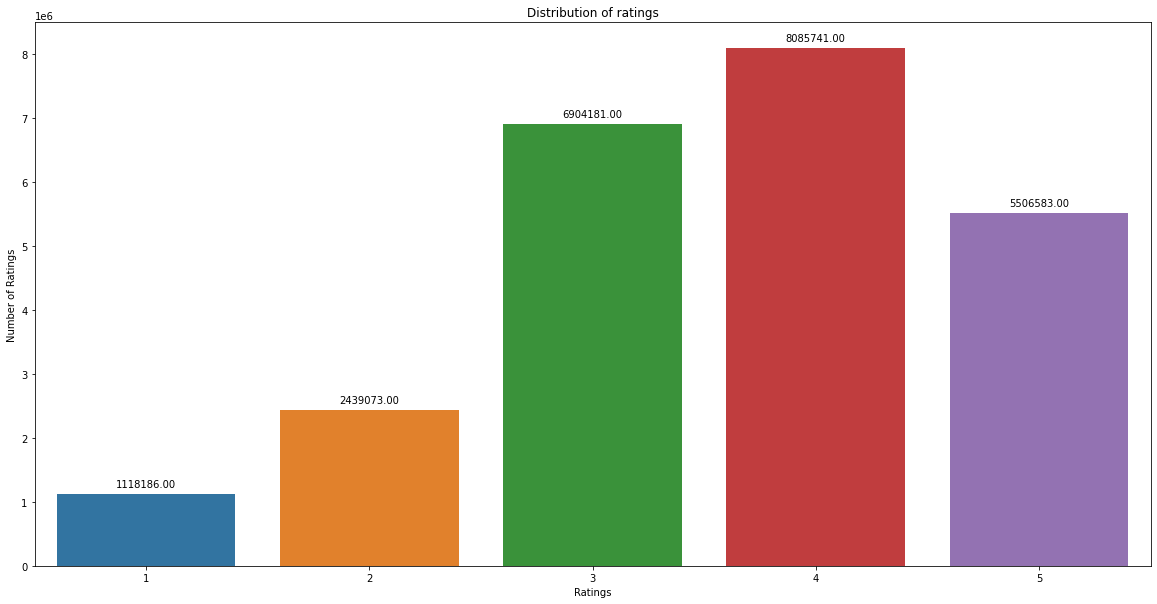

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
ax = sns.countplot(x='rating', data=movies_usrratings)

for p in ax.patches:
  print(p.get_height(),p.get_x(), p.get_width(), (p.get_x() + p.get_width()))
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Distribution of ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Ratings")
plt.show()

#The distribution of ratings

In [26]:
# Calculate the average(mean) rating for each movie
movies_usrratings.groupby('title',axis=0)['rating'].mean()


title
'N Sync: 'N the Mix            2.655936
'N Sync: PopOdyssey Live       3.413043
... And God Spoke              2.872222
10                             3.127638
10 Minute Solution: Pilates    3.171779
                                 ...   
Zig Zag: Special Edition       2.791016
Zigzag                         1.768293
Zombie 3                       2.380368
Zorro                          3.337117
s-Cry-ed                       4.105263
Name: rating, Length: 4471, dtype: float64

In [27]:
# the movies are not sorted according to the average rating values

movies_usrratings.groupby('title',axis=0)['rating'].mean().sort_values(ascending= False).head()



title
Lost: Season 1                                                                 4.670989
Ghost in the Shell: Stand Alone Complex: 2nd Gig                               4.586364
The Simpsons: Season 6                                                         4.581296
Inu-Yasha                                                                      4.554434
Lord of the Rings: The Return of the King: Extended Edition: Bonus Material    4.552000
Name: rating, dtype: float64

In [28]:
# But what if only single user rated any given movie, say the Lost:Season1  was rated as 4.6 by only 1 user, then this order of rating will be wrong. Hence, we need to consider the number of ratings(count) that a given movie receives.
movies_usrratings.groupby('title')['rating'].count()



title
'N Sync: 'N the Mix             497
'N Sync: PopOdyssey Live         92
... And God Spoke               180
10                             4928
10 Minute Solution: Pilates     163
                               ... 
Zig Zag: Special Edition        512
Zigzag                           82
Zombie 3                        163
Zorro                          2026
s-Cry-ed                        817
Name: rating, Length: 4471, dtype: int64

In [29]:
#Sort the movies according to the numer of ratings received by movies
movies_usrratings.groupby('title',axis=0)['rating'].count().sort_values(ascending= False).head()

#Pirate of the Caribbean movies has the most number of ratings given by users

title
Pirates of the Caribbean: The Curse of the Black Pearl    193941
What Women Want                                           162597
Bruce Almighty                                            160454
The Italian Job                                           156183
American Beauty                                           154832
Name: rating, dtype: int64

In [30]:
#Let's create a dataframe to include the above two factors - mean or average rating of each movie and number of ratings for each movie

mean_count_movies = pd.DataFrame(movies_usrratings.groupby('title')['rating'].mean())
mean_count_movies.head()

,rating
title,
'N Sync: 'N the Mix,2.655936
'N Sync: PopOdyssey Live,3.413043
... And God Spoke,2.872222
10,3.127638
10 Minute Solution: Pilates,3.171779


In [31]:
mean_count_movies['count'] = pd.DataFrame(movies_usrratings.groupby('title')['rating'].count())
mean_count_movies.head()

,rating,count
title,,
'N Sync: 'N the Mix,2.655936,497
'N Sync: PopOdyssey Live,3.413043,92
... And God Spoke,2.872222,180
10,3.127638,4928
10 Minute Solution: Pilates,3.171779,163


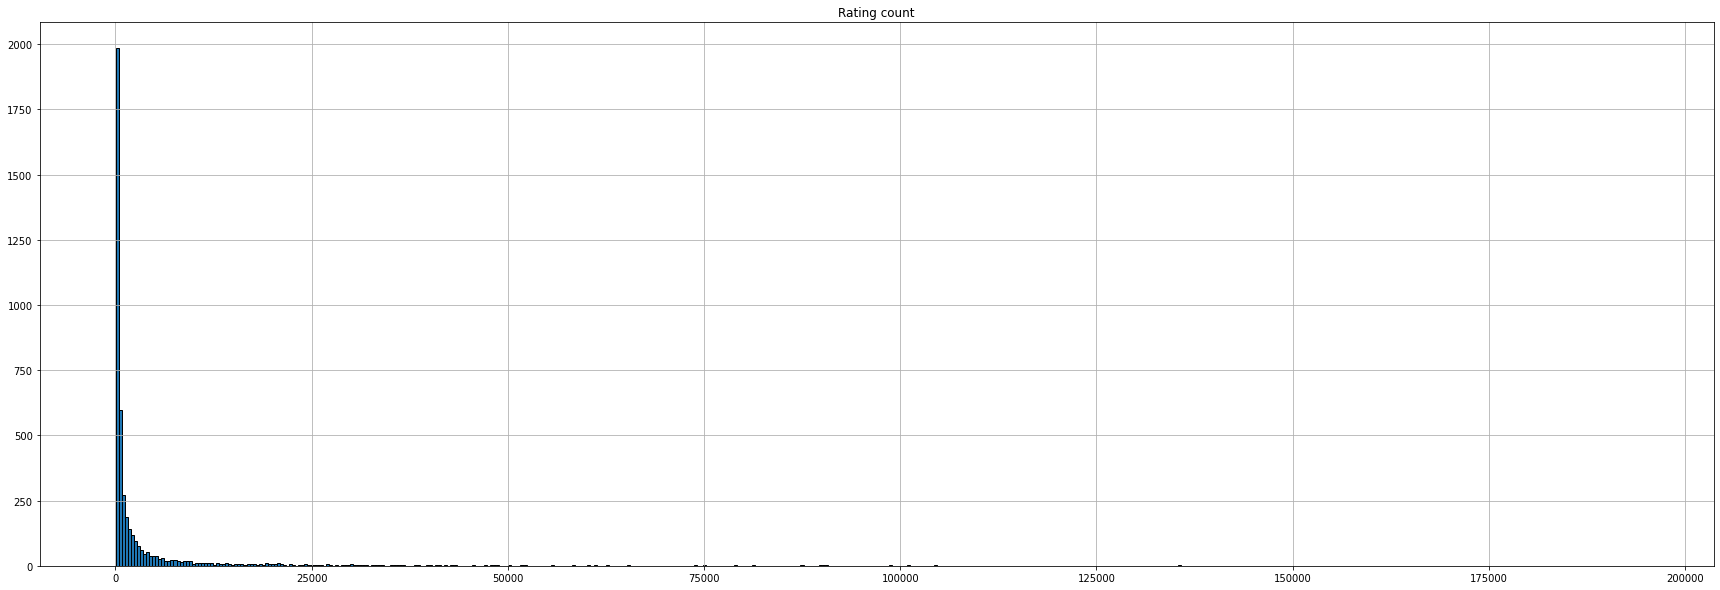

In [32]:
#Plot histogram for the ratings count 
plt.figure(figsize= (30,10))
#plt.xlim(0,5000)
plt.grid()
plt.hist(mean_count_movies['count'],bins=500,edgecolor='black')
plt.title("Rating count")
plt.show()






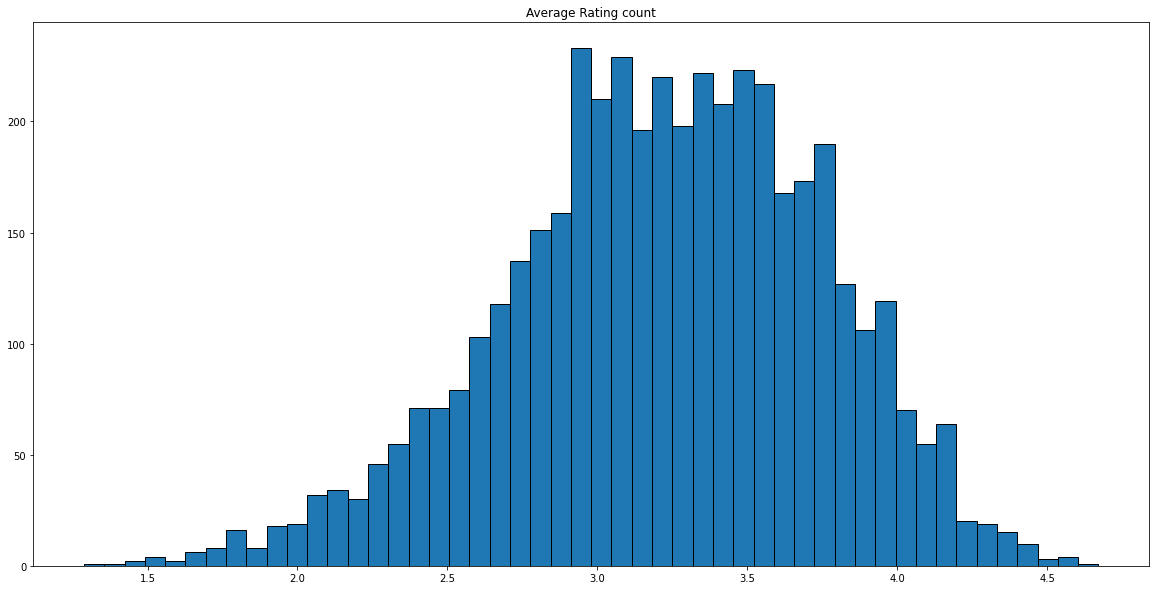

In [33]:
#Plot histogram for the ratings count 
plt.figure(figsize= (20,10))
#plt.grid()
plt.hist(mean_count_movies['rating'],bins=50, edgecolor = 'black')
plt.title("Average Rating count")
plt.show()






<Figure size 2160x1440 with 0 Axes>

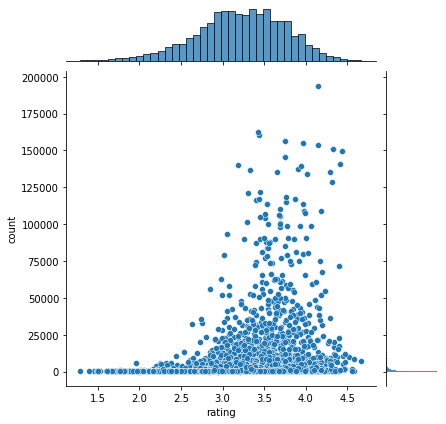

In [34]:
plt.figure(figsize=(30,20))
sns.jointplot(x='rating',y='count',data=mean_count_movies)
plt.show()
#This shows that movies with higher average ratings have high number of ratings. Because a good movie will be watched by many users and hence high ratings will be given by them resulting highest average rating.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   10 non-null     object 
 1   rating  10 non-null     float64
 2   count   10 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


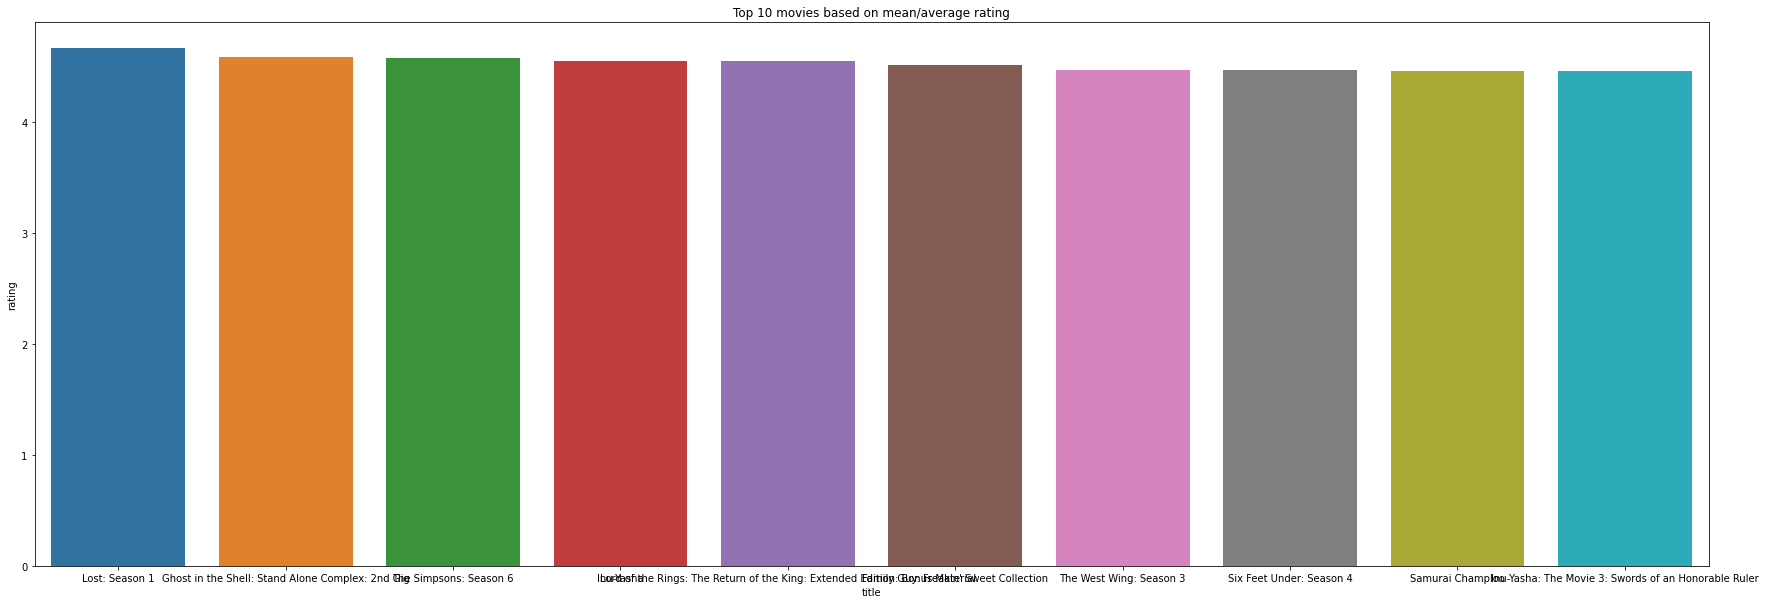

In [35]:
#Top 10 highest rated movies based on average rating

top10avg = mean_count_movies.sort_values('rating', ascending=False).head(10)
top10avg.reset_index(level=0, inplace=True)
top10avg.info()
#movies_usrratings.groupby('title',axis=0)['rating'].mean().sort_values(ascending= False).head(10).bar(legend=True)
plt.figure(figsize=(30,10))
sns.barplot(x='title', y='rating', data=top10avg)
plt.title("Top 10 movies based on mean/average rating")
plt.show()

In [36]:
mean_count_movies.describe()

,rating,count
count,4471.000000,4471.000000
mean,3.221216,5379.951689
std,0.526835,16242.973442
min,1.287879,36.000000
25%,2.885797,192.000000
50%,3.244318,550.000000
75%,3.597402,2544.000000
max,4.670989,193941.000000


In [37]:
# Due to memory issue, we need to drop some data form the dataframe.
# 1. Remove movies whihc has less number of ratings
# 2. remove non-active users i.e., who haven't rated any movies or rated less number of movies
f=['count','mean']
movie_summary = movies_usrratings.groupby('movie_id')['rating'].agg(f)
movie_summary.index = movie_summary.index.map(int)
movie_benchmark = round(movie_summary['count'].quantile(0.7),0)
movie_benchmark
#Minimum number of reviews for movies



1799.0

In [38]:
movie_benchmark

1799.0

In [39]:
drop_movies = movie_summary.loc[movie_summary['count'] < movie_benchmark].index
drop_movies

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='movie_id', length=3149)

In [40]:
user_summary = movies_usrratings.groupby('user_id')['rating'].agg(f)

user_summary.index = user_summary.index.map(int)
user_benchmark = round(user_summary['count'].quantile(0.7),0)
user_benchmark
#Minimum number of reviews by customer


#user_summary['count'].quantile(0.25)#8.0
#user_summary['count'].quantile(0.5)#24
#user_summary['count'].quantile(0.75)#64



52.0

In [41]:
drop_users = user_summary.loc[user_summary['count']<user_benchmark].index

In [42]:
user_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470758 entries, 6 to 2649429
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   count   470758 non-null  int64  
 1   mean    470758 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 10.8 MB


In [43]:
movies_usrratings = movies_usrratings[~ movies_usrratings['movie_id'].isin (drop_movies)]
movies_usrratings = movies_usrratings[~ movies_usrratings['user_id'].isin (drop_users)]
movies_usrratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17337458 entries, 693 to 24052350
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   movie_id      int64  
 1   user_id       int64  
 2   rating        int64  
 3   date          object 
 4   release_year  float64
 5   title         object 
dtypes: float64(1), int64(3), object(2)
memory usage: 925.9+ MB


In [44]:
movies_usrratings.head()

,movie_id,user_id,rating,date,release_year,title
693,3,712664,5,2004-02-01,1997.0,Character
694,3,1331154,4,2004-07-03,1997.0,Character
695,3,2632461,3,2005-07-22,1997.0,Character
696,3,44937,5,2004-06-22,1997.0,Character
697,3,656399,4,2003-09-20,1997.0,Character


## **Content-Based Filtering Approach - Calculate Similarity between the movies using Pearson's Correlation method**

In [45]:
# We need to create a user-movie matrix to find the correlation between the movies.
#rows - users
#columns - movies
#observations - rating for the movie given by the user

user_movie_matrix = movies_usrratings.pivot_table(index='user_id', columns = 'title', values='rating')

#user_movie_matrix.head()



In [46]:
user_movie_matrix.head()

title,10,10 Things I Hate About You,101 Dalmatians II: Patch's London Adventure,11:14,13 Ghosts,18 Again,1984,2 Fast 2 Furious,200 Cigarettes,2010: The Year We Make Contact,24 Hour Party People,25th Hour,28 Days Later,50 First Dates,7 Seconds,9 1/2 Weeks,A Beautiful Mind,A Better Tomorrow II,A Christmas Carol,A Cinderella Story,A Dirty Shame,A Fistful of Dollars,A Guy Thing,A Hard Day's Night: Collector's Series,A Home of Our Own,A Lesson Before Dying,A Little Princess,A Love Song for Bobby Long,A Man Apart,A Mighty Wind,A Night at the Opera,A Nightmare on Elm Street,A Nightmare on Elm Street 3: Dream Warriors,A Streetcar Named Desire,A Thousand Acres,A Walk in the Clouds,ABC Primetime: Mel Gibson's The Passion of the Christ,Abandon,Abbott & Costello Meet the Mummy,About Adam,...,Walking with Dinosaurs,Wallace & Gromit in Three Amazing Adventures,War Games,Wayne's World,Westworld,Whale Rider,What Women Want,What the #$*! Do We Know!?,What's Up,When Harry Met Sally,Where Eagles Dare,Where the Red Fern Grows,While You Were Sleeping,White,White Squall,Who Framed Roger Rabbit?: Special Edition,Who is Cletis Tout?,Wild Things,Wings of Desire,Winnie the Pooh: Springtime with Roo,With a Friend Like Harry,Without a Trace: Season 1,Wolf,Woman Thou Art Loosed,Woman of the Year,Woman on Top,Wonder Boys,Wonderfalls: The Complete Series,Wrongfully Accused,X2: X-Men United,Xena: Warrior Princess: Season 3,Xena: Warrior Princess: Series Finale,Y Tu Mama Tambien,Yellow Submarine,Yi Yi,Yojimbo,Young Black Stallion,Youngblood,Yu-Gi-Oh!: The Movie,Zorro
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,4.0,NaN,5.0,3.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,4.0,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Let's us find the ratings for the movie "X2: X-Men United"

xmen_ratings = user_movie_matrix['X2: X-Men United']
xmen_ratings.head()

user_id
6      2.0
7      4.0
79     4.0
97     NaN
134    5.0
Name: X2: X-Men United, dtype: float64

In [48]:
# Returns a list of ratings given by various users for X-men movie in a pandas series

# We will find the list of movies that are similar to X-men United movie by using correlation method

movies_like_xmen = user_movie_matrix.corrwith(xmen_ratings)

movies_like_xmen.head() # This gives list of movies similar to xmen movie along with its correlation value. Closer to 1 indicates highest similarity




title
10                                             0.142181
10 Things I Hate About You                     0.226436
101 Dalmatians II: Patch's London Adventure    0.230097
11:14                                          0.130894
13 Ghosts                                      0.256033
dtype: float64

In [49]:
#we can store the above in a dataframe

corr_x_men = pd.DataFrame(movies_like_xmen, columns=['Correlation'])
corr_x_men.head()


,Correlation
title,
10,0.142181
10 Things I Hate About You,0.226436
101 Dalmatians II: Patch's London Adventure,0.230097
11:14,0.130894
13 Ghosts,0.256033


In [50]:
#sorting the movies in the decreasing order of correlation values

corr_x_men.sort_values('Correlation', inplace=True, ascending=False)
corr_x_men.head(10)

,Correlation
title,
X2: X-Men United,1.000000
Batman Beyond: The Movie,0.384550
Justice League,0.375967
Justice League: Justice on Trial,0.361393
Batman Beyond: Return of the Joker,0.338025
Batman Begins,0.335256
Batman: Mask of the Phantasm,0.328229
Batman: The Animated Series: Tales of the Dark Knight,0.327040
Dragon Ball Z: Super Android 13,0.316666


In [51]:
#we can include count of ratings for these movies and consider only those movies which has been most rated by the users say > 2000 users atleast

corr_x_men = corr_x_men.join(mean_count_movies['count'])
corr_x_men.head()

,Correlation,count
title,,
X2: X-Men United,1.000000,98720
Batman Beyond: The Movie,0.384550,2614
Justice League,0.375967,3591
Justice League: Justice on Trial,0.361393,2961
Batman Beyond: Return of the Joker,0.338025,3704


In [52]:
mean_count_movies.head()
mean_count_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4471 entries, 'N Sync: 'N the Mix to s-Cry-ed
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  4471 non-null   float64
 1   count   4471 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 264.8+ KB


In [53]:
mean_count_movies.loc['Silent Service']

rating      2.571429
count     105.000000
Name: Silent Service, dtype: float64

In [54]:
corr_x_men[corr_x_men['count']>2000].sort_values('Correlation', ascending=False)
corr_x_men.head(10)


,Correlation,count
title,,
X2: X-Men United,1.000000,98720
Batman Beyond: The Movie,0.384550,2614
Justice League,0.375967,3591
Justice League: Justice on Trial,0.361393,2961
Batman Beyond: Return of the Joker,0.338025,3704
Batman Begins,0.335256,54922
Batman: Mask of the Phantasm,0.328229,2823
Batman: The Animated Series: Tales of the Dark Knight,0.327040,2432
Dragon Ball Z: Super Android 13,0.316666,2426


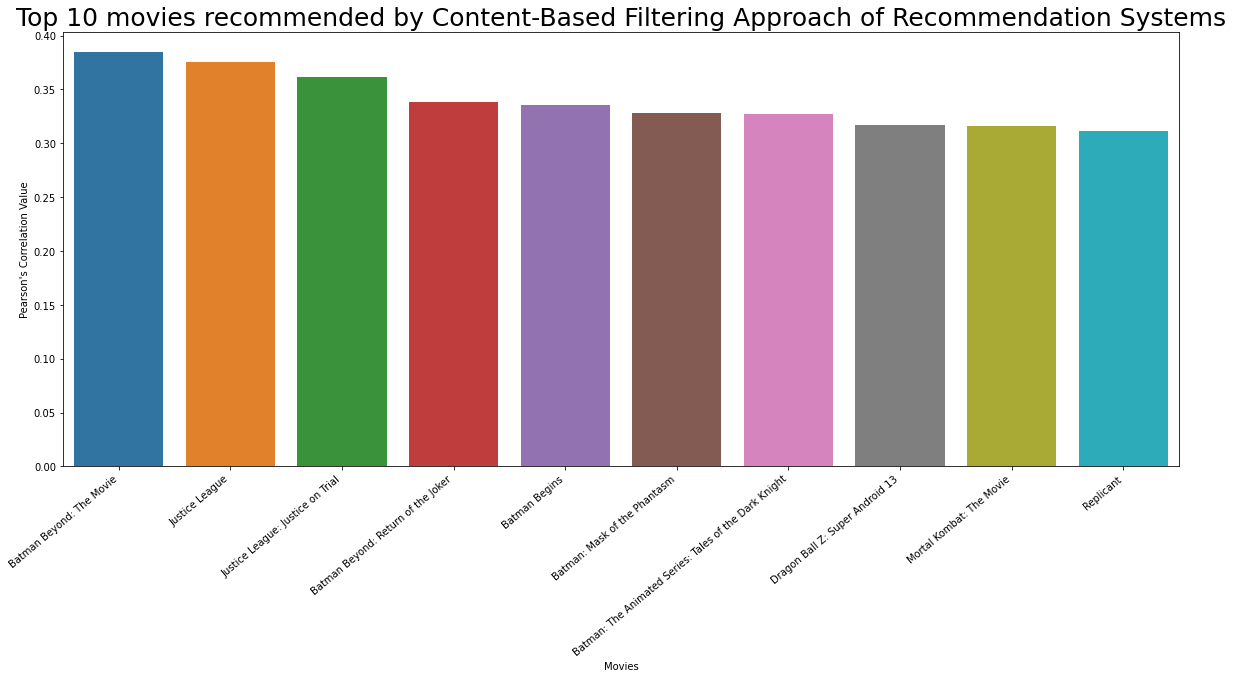

In [55]:
top10corr = corr_x_men[1:11]
top10corr.reset_index(inplace=True)
plt.figure(figsize=(20,8))
ax = sns.barplot(x='title',y='Correlation', data = top10corr)
plt.title("Top 10 movies recommended by Content-Based Filtering Approach of Recommendation Systems",fontsize=25)
plt.xlabel("Movies")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha='right')

plt.ylabel("Pearson's Correlation Value")
plt.show()

## **Content-Based Filtering Approach - Calculate Similarity between the movies using Pearson's Correlation method**

In [56]:
# We need to create a user-movie matrix to find the correlation between the movies.
#rows - users
#columns - movies
#observations - rating for the movie given by the user

user_movie_matrix = movies_usrratings.pivot_table(index='user_id', columns = 'title', values='rating')

#user_movie_matrix.head()



In [57]:
user_movie_matrix.head()

title,10,10 Things I Hate About You,101 Dalmatians II: Patch's London Adventure,11:14,13 Ghosts,18 Again,1984,2 Fast 2 Furious,200 Cigarettes,2010: The Year We Make Contact,24 Hour Party People,25th Hour,28 Days Later,50 First Dates,7 Seconds,9 1/2 Weeks,A Beautiful Mind,A Better Tomorrow II,A Christmas Carol,A Cinderella Story,A Dirty Shame,A Fistful of Dollars,A Guy Thing,A Hard Day's Night: Collector's Series,A Home of Our Own,A Lesson Before Dying,A Little Princess,A Love Song for Bobby Long,A Man Apart,A Mighty Wind,A Night at the Opera,A Nightmare on Elm Street,A Nightmare on Elm Street 3: Dream Warriors,A Streetcar Named Desire,A Thousand Acres,A Walk in the Clouds,ABC Primetime: Mel Gibson's The Passion of the Christ,Abandon,Abbott & Costello Meet the Mummy,About Adam,...,Walking with Dinosaurs,Wallace & Gromit in Three Amazing Adventures,War Games,Wayne's World,Westworld,Whale Rider,What Women Want,What the #$*! Do We Know!?,What's Up,When Harry Met Sally,Where Eagles Dare,Where the Red Fern Grows,While You Were Sleeping,White,White Squall,Who Framed Roger Rabbit?: Special Edition,Who is Cletis Tout?,Wild Things,Wings of Desire,Winnie the Pooh: Springtime with Roo,With a Friend Like Harry,Without a Trace: Season 1,Wolf,Woman Thou Art Loosed,Woman of the Year,Woman on Top,Wonder Boys,Wonderfalls: The Complete Series,Wrongfully Accused,X2: X-Men United,Xena: Warrior Princess: Season 3,Xena: Warrior Princess: Series Finale,Y Tu Mama Tambien,Yellow Submarine,Yi Yi,Yojimbo,Young Black Stallion,Youngblood,Yu-Gi-Oh!: The Movie,Zorro
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,4.0,NaN,5.0,3.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,4.0,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Let's us find the ratings for the movie "X2: X-Men United"

xmen_ratings = user_movie_matrix['X2: X-Men United']
xmen_ratings.head()

user_id
6      2.0
7      4.0
79     4.0
97     NaN
134    5.0
Name: X2: X-Men United, dtype: float64

In [59]:
# Returns a list of ratings given by various users for X-men movie in a pandas series

# We will find the list of movies that are similar to X-men United movie by using correlation method

movies_like_xmen = user_movie_matrix.corrwith(xmen_ratings)

movies_like_xmen.head() # This gives list of movies similar to xmen movie along with its correlation value. Closer to 1 indicates highest similarity




title
10                                             0.142181
10 Things I Hate About You                     0.226436
101 Dalmatians II: Patch's London Adventure    0.230097
11:14                                          0.130894
13 Ghosts                                      0.256033
dtype: float64

In [60]:
#we can store the above in a dataframe

corr_x_men = pd.DataFrame(movies_like_xmen, columns=['Correlation'])
corr_x_men.head()


,Correlation
title,
10,0.142181
10 Things I Hate About You,0.226436
101 Dalmatians II: Patch's London Adventure,0.230097
11:14,0.130894
13 Ghosts,0.256033


In [61]:
#sorting the movies in the decreasing order of correlation values

corr_x_men.sort_values('Correlation', inplace=True, ascending=False)
corr_x_men.head(10)

,Correlation
title,
X2: X-Men United,1.000000
Batman Beyond: The Movie,0.384550
Justice League,0.375967
Justice League: Justice on Trial,0.361393
Batman Beyond: Return of the Joker,0.338025
Batman Begins,0.335256
Batman: Mask of the Phantasm,0.328229
Batman: The Animated Series: Tales of the Dark Knight,0.327040
Dragon Ball Z: Super Android 13,0.316666


In [62]:
#we can include count of ratings for these movies and consider only those movies which has been most rated by the users say > 2000 users atleast

corr_x_men = corr_x_men.join(mean_count_movies['count'])
corr_x_men.head()

,Correlation,count
title,,
X2: X-Men United,1.000000,98720
Batman Beyond: The Movie,0.384550,2614
Justice League,0.375967,3591
Justice League: Justice on Trial,0.361393,2961
Batman Beyond: Return of the Joker,0.338025,3704


In [63]:
mean_count_movies.head()
mean_count_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4471 entries, 'N Sync: 'N the Mix to s-Cry-ed
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  4471 non-null   float64
 1   count   4471 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 264.8+ KB


In [64]:
mean_count_movies.loc['Silent Service']

rating      2.571429
count     105.000000
Name: Silent Service, dtype: float64

In [65]:
corr_x_men[corr_x_men['count']>2000].sort_values('Correlation', ascending=False)
corr_x_men.head(10)


,Correlation,count
title,,
X2: X-Men United,1.000000,98720
Batman Beyond: The Movie,0.384550,2614
Justice League,0.375967,3591
Justice League: Justice on Trial,0.361393,2961
Batman Beyond: Return of the Joker,0.338025,3704
Batman Begins,0.335256,54922
Batman: Mask of the Phantasm,0.328229,2823
Batman: The Animated Series: Tales of the Dark Knight,0.327040,2432
Dragon Ball Z: Super Android 13,0.316666,2426


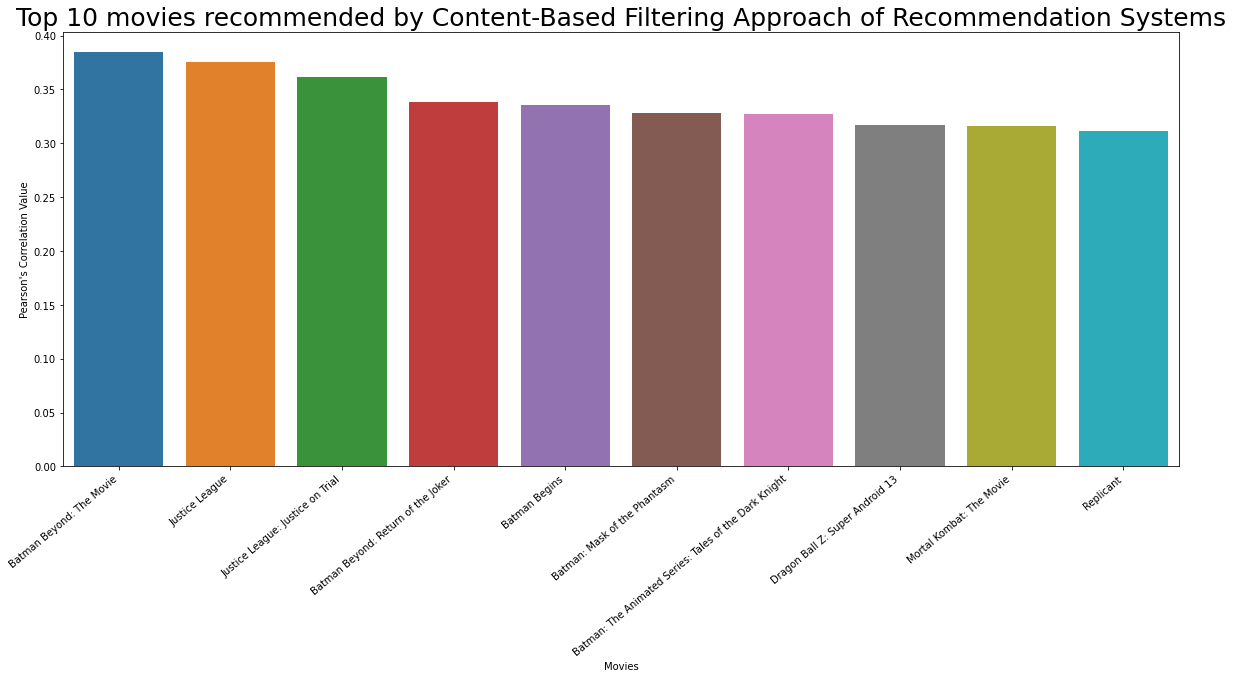

In [66]:
top10corr = corr_x_men[1:11]
top10corr.reset_index(inplace=True)
plt.figure(figsize=(20,8))
ax = sns.barplot(x='title',y='Correlation', data = top10corr)
plt.title("Top 10 movies recommended by Content-Based Filtering Approach of Recommendation Systems",fontsize=25)
plt.xlabel("Movies")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha='right')

plt.ylabel("Pearson's Correlation Value")
plt.show()

**Collaborative - Based Filtering Approach**


In [67]:
# Step 1 & 2
# Check the movies that is not watched by the intended(active) user for whom we are going to make the predictions. And collect those movies and its users who watched and rated them --> Ratings User Matrix
# Learn the similarity weights - Similarity between the intended user and other users based on commonly watched and rated movies by them --> Similarity Index


# Step 3
# Multiply the above two matrices to generate Weighted Ratings Matrix which will represent the users' neighbour's (similar users) opinions about the candidate movies for recommendation.
# It incorporates the behaviour of other users and gives more weight to the ratings of those users who are more similar to the active user.

# Step 4
# Use the Weighted Ratings matrix and Calculate the sum of weights for all the movies
# Calculate the sum of Similarity index values of users who watched the movies 


# Step 5
# Multiple the results of Step 4 with each other to generate the Recommendation matrix


In [68]:
# User - User Collaborative filtering:
# Simialr users forms the neighbourhood i.e., their collective preferences or tastes that matches with the intended user is considered.

# For example we want to recommend some movies to User 1
# If User 1 watched movie A, B and User 2 watched movies A, B, C and User 3 watched D, E
# Then the system identifies users similar to user 1. User 1 & 2 are similar since they watched same set of movies A & B. Hence the system will recommend movie C to User 1 since user 2 has watched C.


In [69]:
# Item - Item Collaborative filtering:
# Similar items forms the neighbourhood on the behaviour of users.

#For example 
# If User 1 watched movies A, C, User 2 -> A, C User 3 -> C, D

# Here the items A, C are similar
# Therefore, the systems recommends movie A to user 3 because people who watched movie C also watched movie A. Since user 3 had already atched movie C, he/she will be recommended to watch movie A

In [70]:
df.head()

,movie_id,user_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
